# Анализ базы данных сервиса книг 

**Цель -** осуществить анализ данных для формулировки ценностного предложения для нового продукта.

**Задачи:**
- Посчитать количество книг, вышедших после 1 января 2000 года;
- Для каждой книги посчитайть количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц;
- Определите автора с самой высокой средней оценкой книг с 50 и более оценками;
- Посчитайть среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

**Описание данных**

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

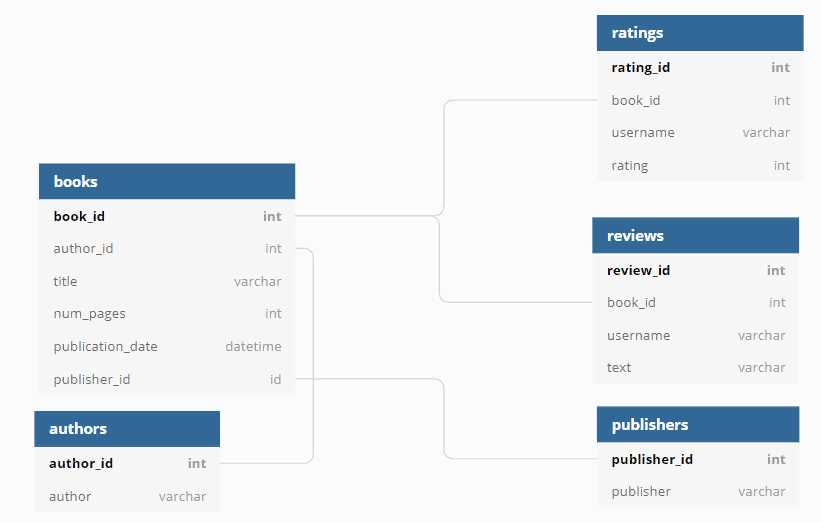

## Подключение к базе данных

In [18]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

## Обзор данных

In [19]:
tabels = ['books', 'authors', 'ratings', 'reviews', 'publishers']

for tabel in tabels:
    print(tabel)
    query = """
            SELECT * 
            FROM {}
            """.format(tabel)
    display(pd.io.sql.read_sql(query, con = engine).head()) 

books


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


authors


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


ratings


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


reviews


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


publishers


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


## Анализ данных

### Подсчёт количества книг, вышедших после 1 января 2000 года

In [20]:
query = """
SELECT COUNT(*) 
FROM books 
WHERE publication_date > '2000-01-01'
"""
pd.io.sql.read_sql(query, con = engine) 

,count
0,819


После 1 января 2000 года вышло 819 книг.

### Количество обзоров и средняя оценка для каждой книги

In [21]:
query = """
SELECT books.title as title, 
    AVG(ratings.rating) as mean_rating,
    COUNT(DISTINCT(reviews.review_id)) as count_reviews
FROM books 
LEFT JOIN ratings ON ratings.book_id=books.book_id
LEFT JOIN reviews ON reviews.book_id=books.book_id
GROUP BY books.book_id
ORDER BY title
"""
pd.io.sql.read_sql(query, con = engine)

,title,mean_rating,count_reviews
0,'Salem's Lot,3.666667,2
1,1 000 Places to See Before You Die,2.500000,1
2,13 Little Blue Envelopes (Little Blue Envelope...,4.666667,3
3,1491: New Revelations of the Americas Before C...,4.500000,2
4,1776,4.000000,4
...,...,...,...
995,Wyrd Sisters (Discworld #6; Witches #2),3.666667,3
996,Xenocide (Ender's Saga #3),3.400000,3
997,Year of Wonders,3.200000,4
998,You Suck (A Love Story #2),4.500000,2


Выведена таблица с количеством обзоров и среденей оценкой для каждой книги.

### Издательство, которое выпустило наибольшее число книг толще 50 страниц

In [22]:
query = """
SELECT publishers.publisher, COUNT(books.num_pages)
FROM books 
LEFT JOIN publishers ON publishers.publisher_id = books.publisher_id
WHERE num_pages > 50
GROUP BY  publishers.publisher
ORDER BY count DESC
LIMIT 1
"""
pd.io.sql.read_sql(query, con = engine) 

,publisher,count
0,Penguin Books,42


"Penguin Books" - издательство, выпустившее наибольшее число книг толще 50 страниц.

### Автор с самой высокой средней оценкой книг (книги с 50 и более оценками)

In [23]:
query = """
WITH
    books_with_50_ratings_count AS (SELECT books.book_id, books.title as title,
                                   COUNT(ratings.book_id), AVG(ratings.rating) as mean_rating
                                   FROM ratings
                                   LEFT JOIN books ON books.book_id=ratings.book_id
                                   GROUP BY books.book_id
                                   HAVING COUNT(ratings.book_id) >= 50)

SELECT authors.author as author, books_with_50_ratings_count.mean_rating as mean_rating
FROM books_with_50_ratings_count
LEFT JOIN books ON books.book_id = books_with_50_ratings_count.book_id
LEFT JOIN authors ON authors.author_id = books.author_id
ORDER BY mean_rating DESC
LIMIT 1
"""
pd.io.sql.read_sql(query, con = engine) 

,author,mean_rating
0,J.K. Rowling/Mary GrandPré,4.414634


Авторами с самой высокой оценкой книг стали "J.K. Rowling (писатель) / Mary GrandPré (иллюстратор)"

### Среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [24]:
query = """
WITH
    users_50_more_ratings as (SELECT username, COUNT(*) as count_rating
                            FROM ratings 
                            GROUP BY username
                            HAVING COUNT(*) > 50),

    count_of_reviews_per_user as (SELECT reviews.username as username, COUNT(*) as count_reviews
                                FROM reviews
                                INNER JOIN users_50_more_ratings ON users_50_more_ratings.username=reviews.username
                                GROUP BY reviews.username)

SELECT AVG(count_reviews)
FROM count_of_reviews_per_user
"""
pd.io.sql.read_sql(query, con = engine) 

,avg
0,24.333333


Среднее количество обзоров от пользователей, которые поставили больше 50 оценок составило 24.

## Выводы 

- После 1 января 2000 года вышло 819 книг.
- Выведена таблица с количеством обзоров и среденей оценкой для каждой книги.
- "Penguin Books" - издательство, выпустившее наибольшее число книг толще 50 страниц.
- Авторами с самой высокой оценкой книг стали "J.K. Rowling (писатель) / Mary GrandPré (иллюстратор)"
- Среднее количество обзоров от пользователей, которые поставили больше 50 оценок составило 24.